In [1]:
# 사용할 모든 파일 리스트로 읽어오기
import os
import numpy as np
import pandas as pd
os_file_list = os.listdir('C:/Users/Happy/Desktop/논문용/krwusdtdata/전처리된파일')

read_path = "C:\\Users\\Happy\\Desktop\\논문용\\krwusdtdata\\전처리된파일\\"


# 딕셔너리 안에 모든 데이터 프레임 저장
All_data = {}

for files in os_file_list:
    print(files)
    df= pd.read_csv(read_path+files, encoding = "cp949")
    All_data[files[:-4]] = df

key_list = list(All_data.keys())
key_list = list(set(key_list) - {"BTC_KRW","bin_data"})
key_list

bin_data.csv
BTC_KRW.csv
DXY.csv
KRW_CNY.csv
KRW_EUR.csv
KRW_USDT.csv
krx_100.csv
니케이 225.csv
독일.csv
미국금리.csv
중화인민공화국 상해종합.csv
코스피.csv
프랑스.csv
한국금리.csv


['KRW_CNY',
 '한국금리',
 'DXY',
 '니케이 225',
 '코스피',
 'krx_100',
 'KRW_USDT',
 'KRW_EUR',
 '중화인민공화국 상해종합',
 '독일',
 '프랑스',
 '미국금리']

In [2]:
# # All_data , key_list
# for i in range(len(key_list)):
#     All_data[key_list[i]]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()


KRW_CNY


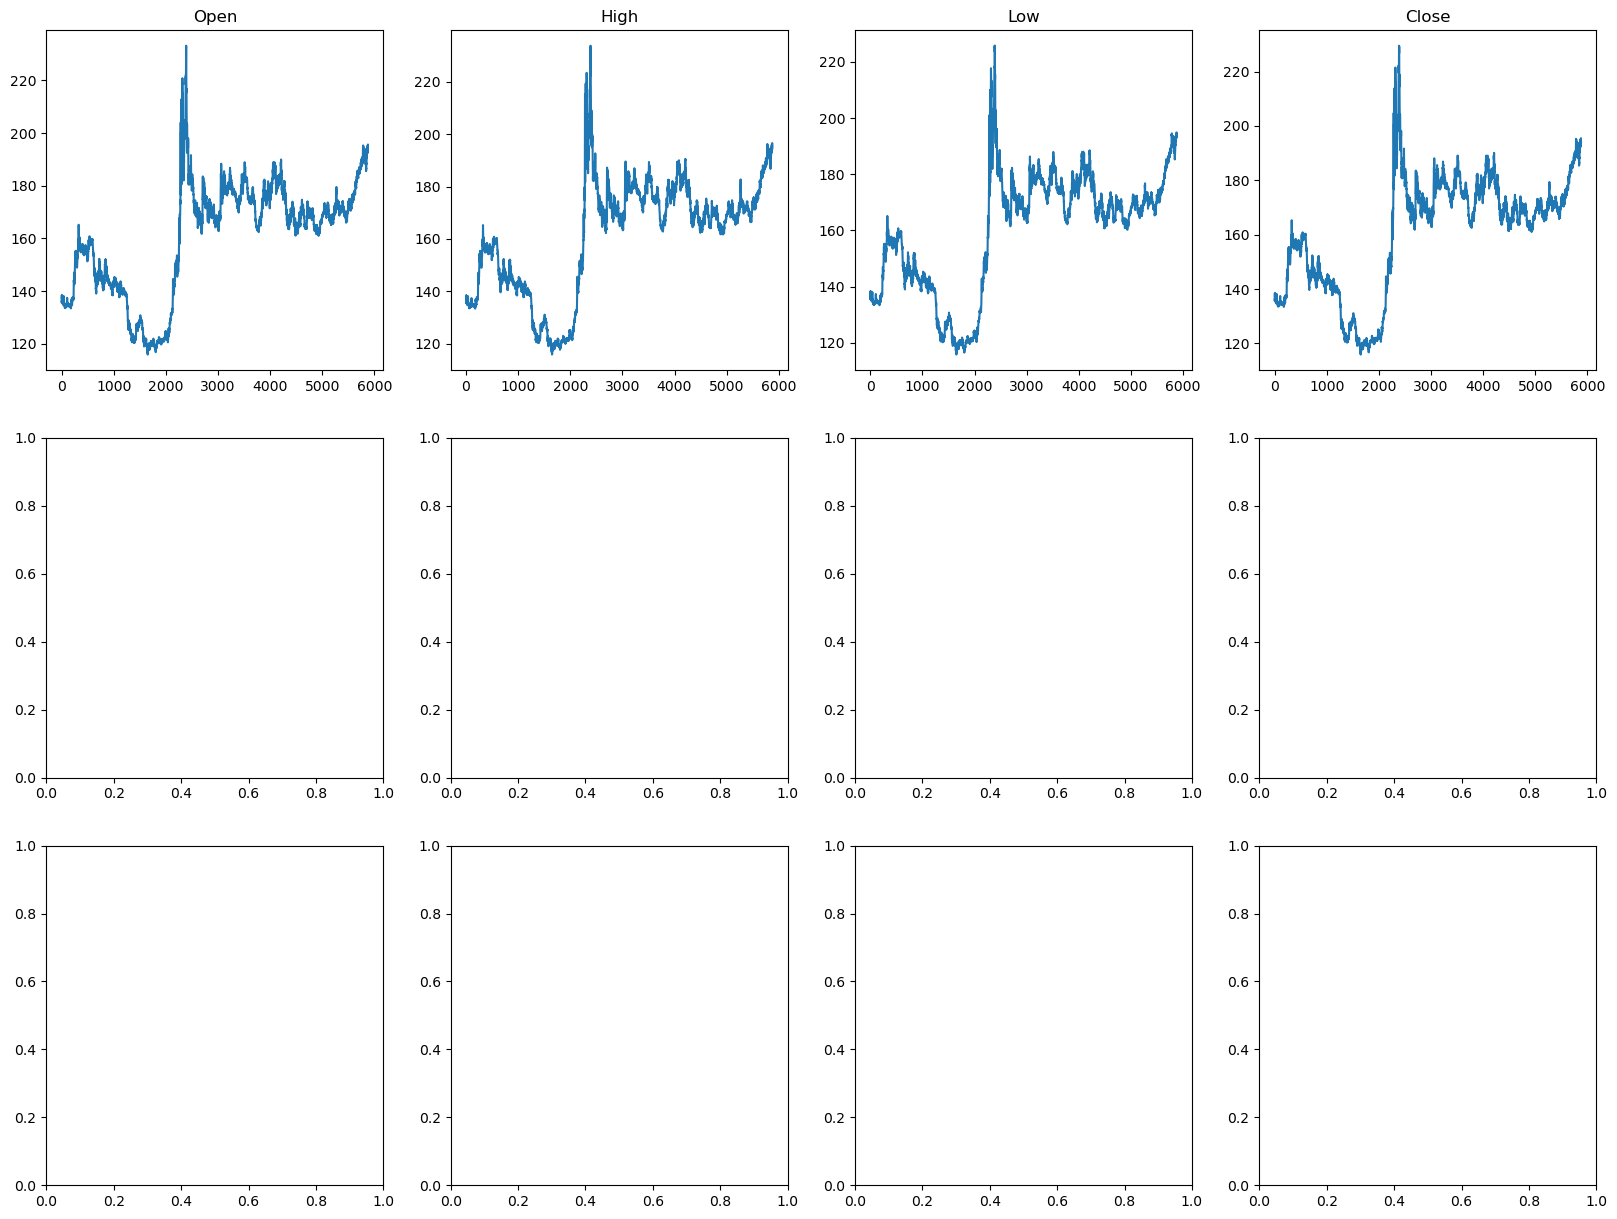

한국금리


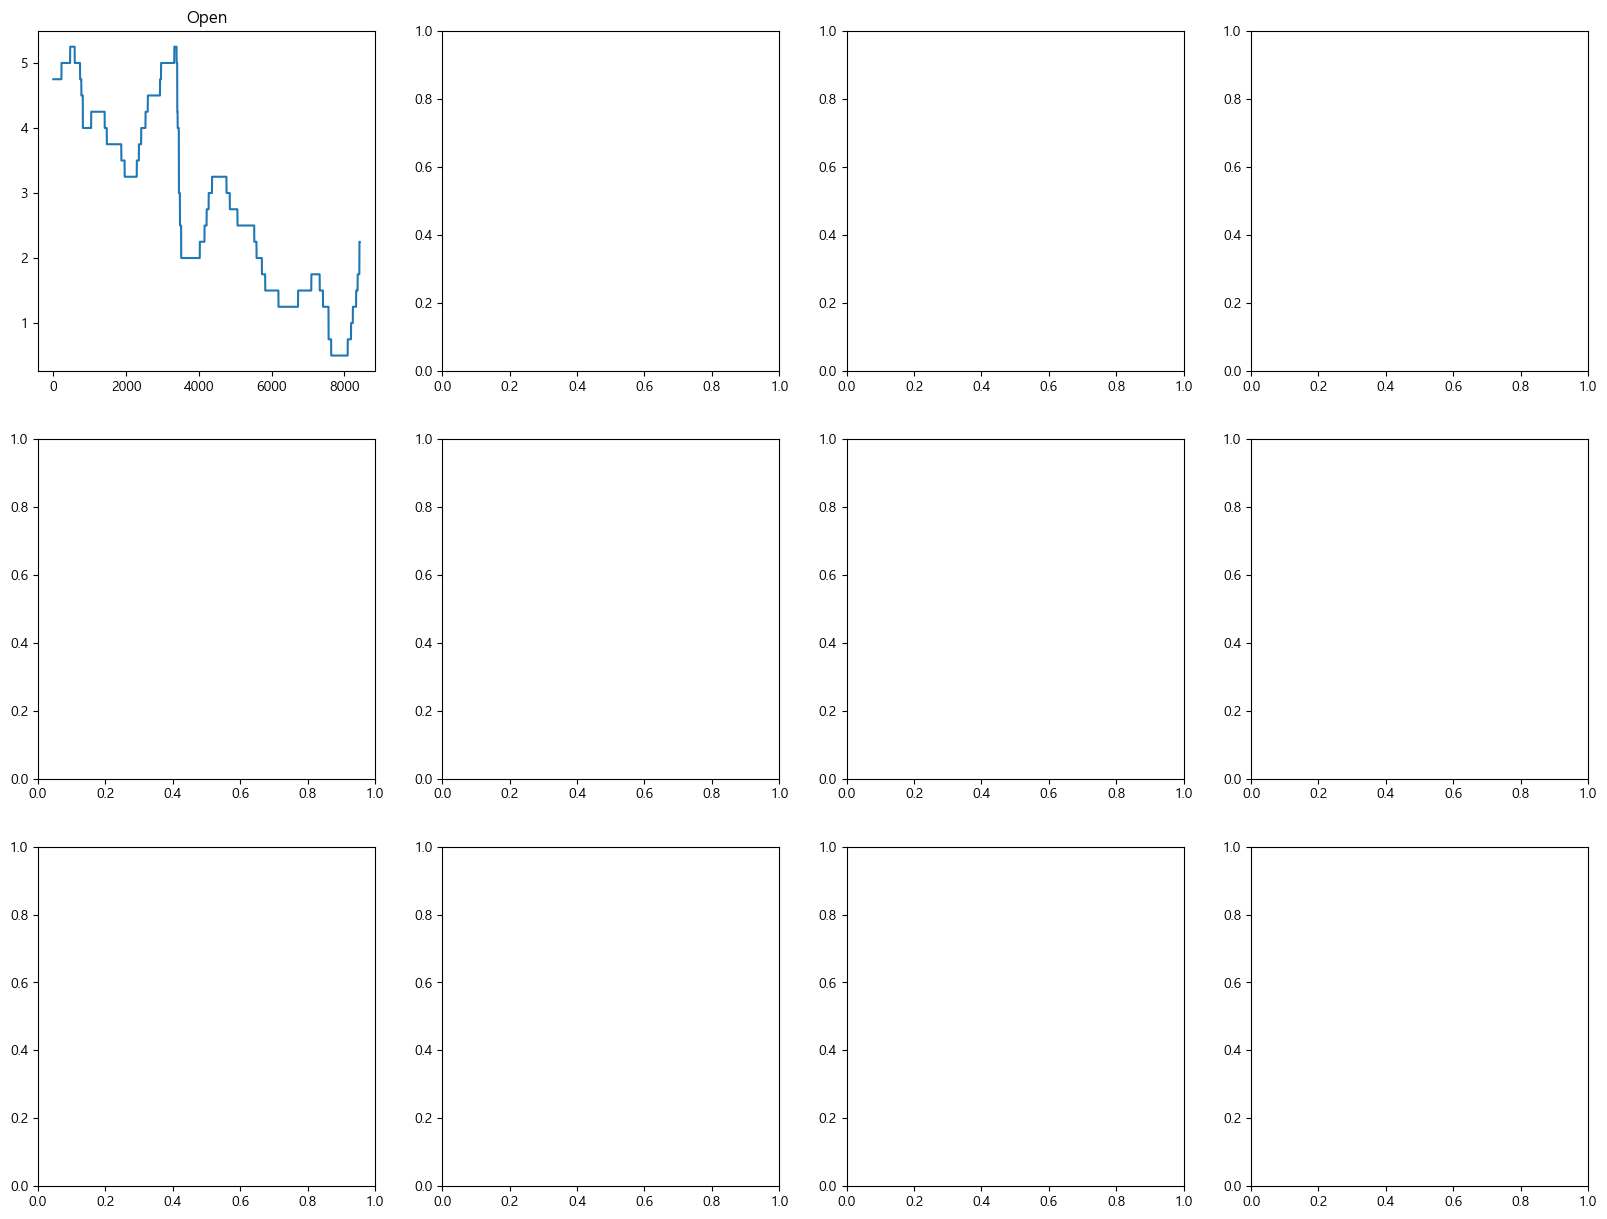

DXY


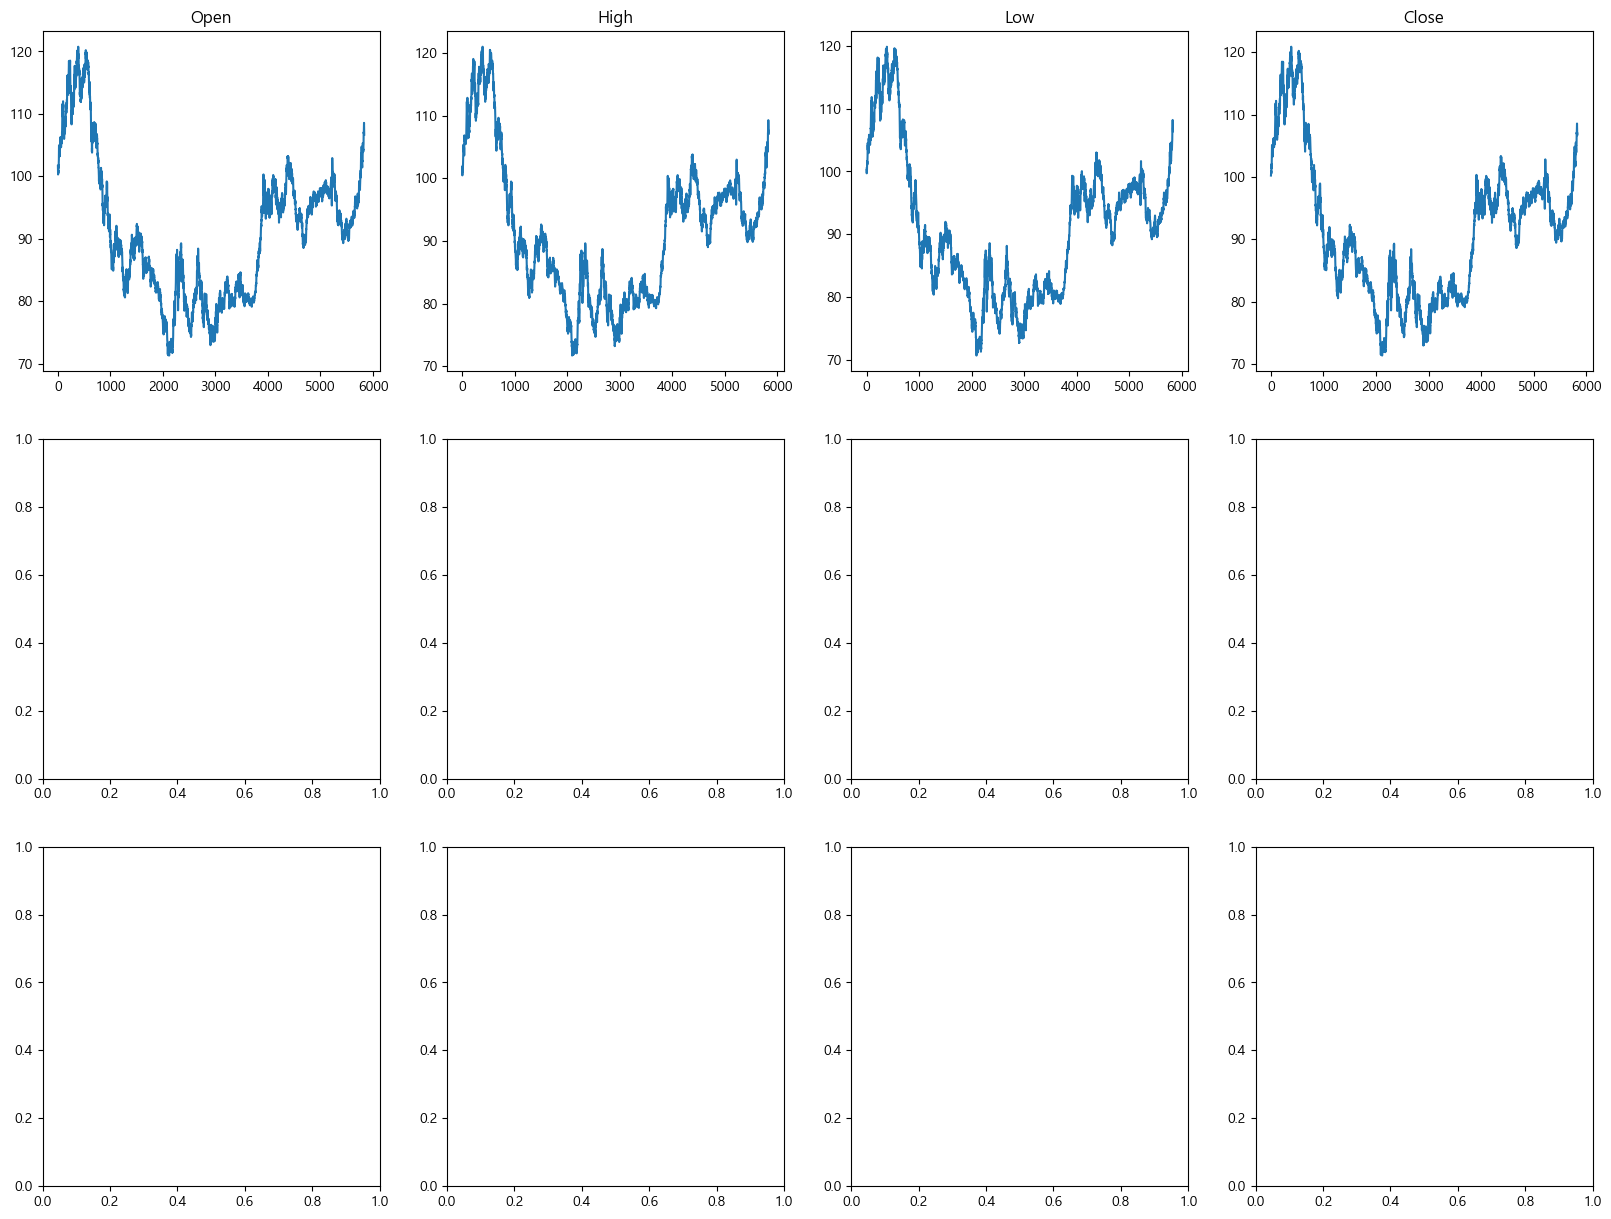

니케이 225


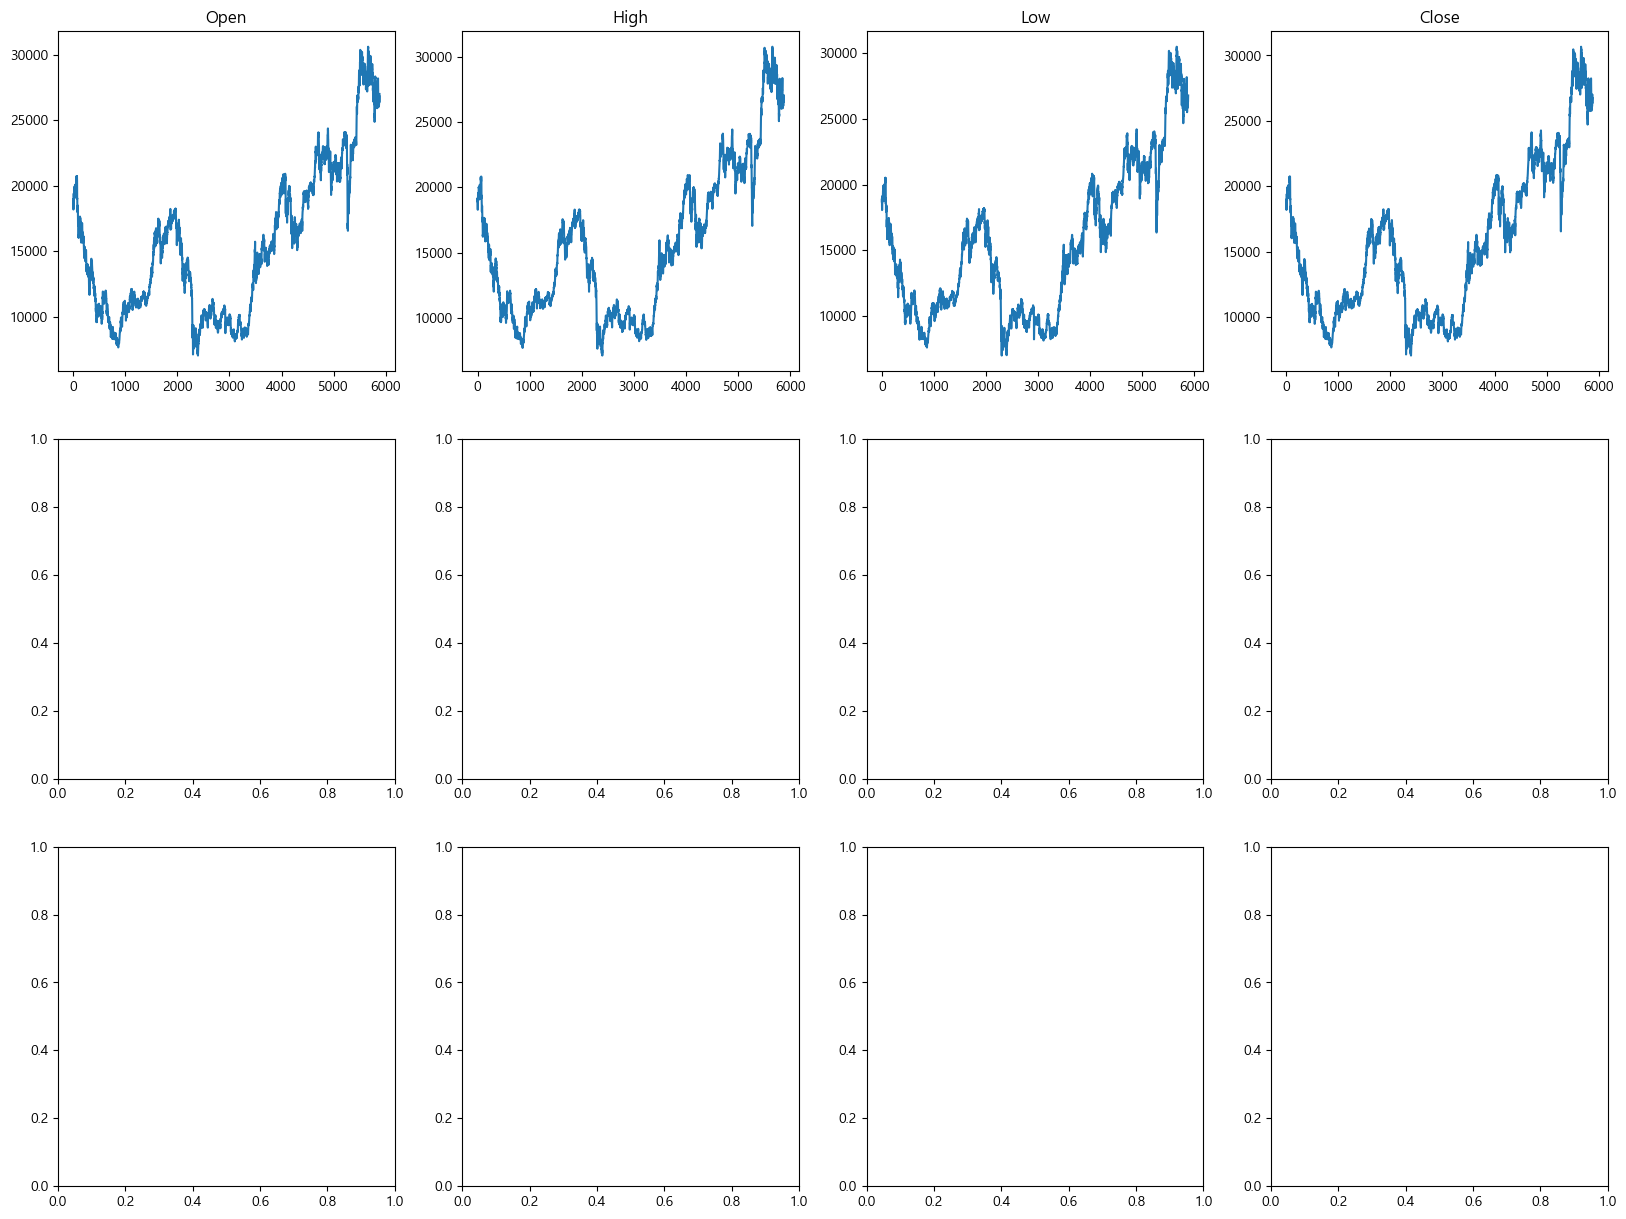

코스피


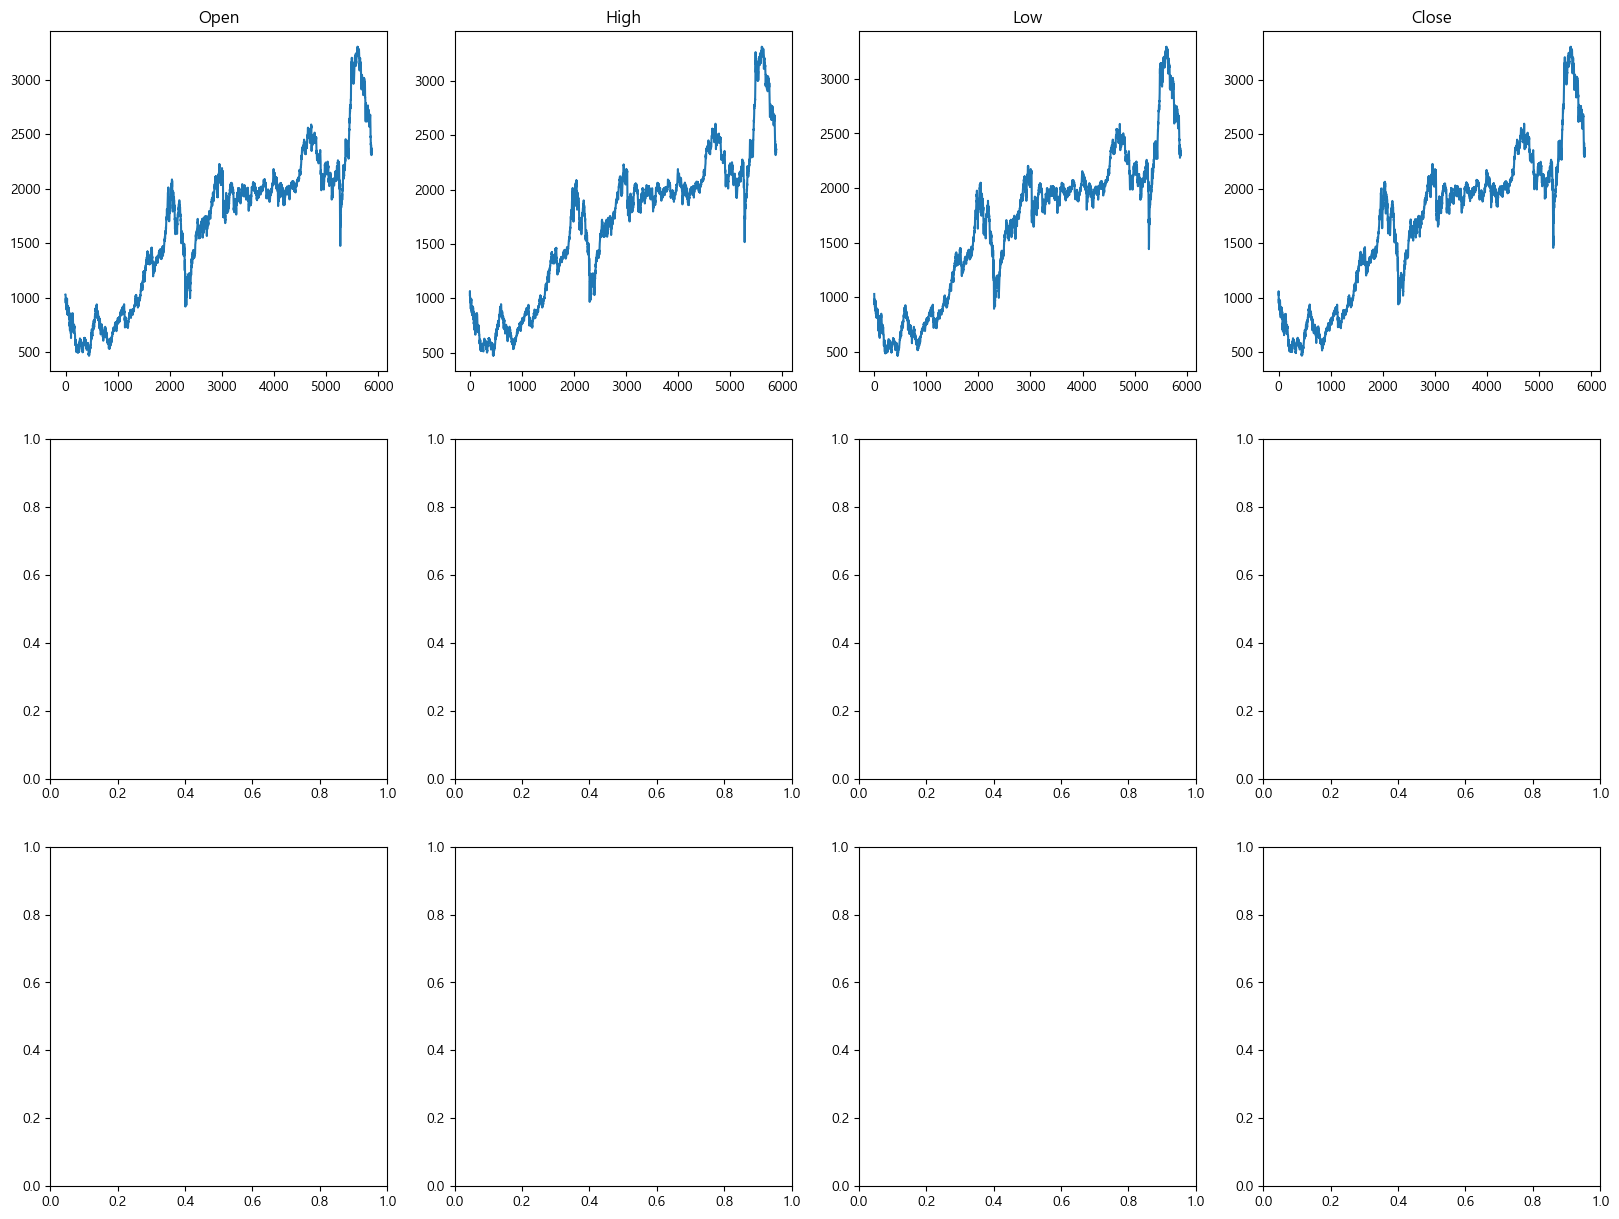

krx_100


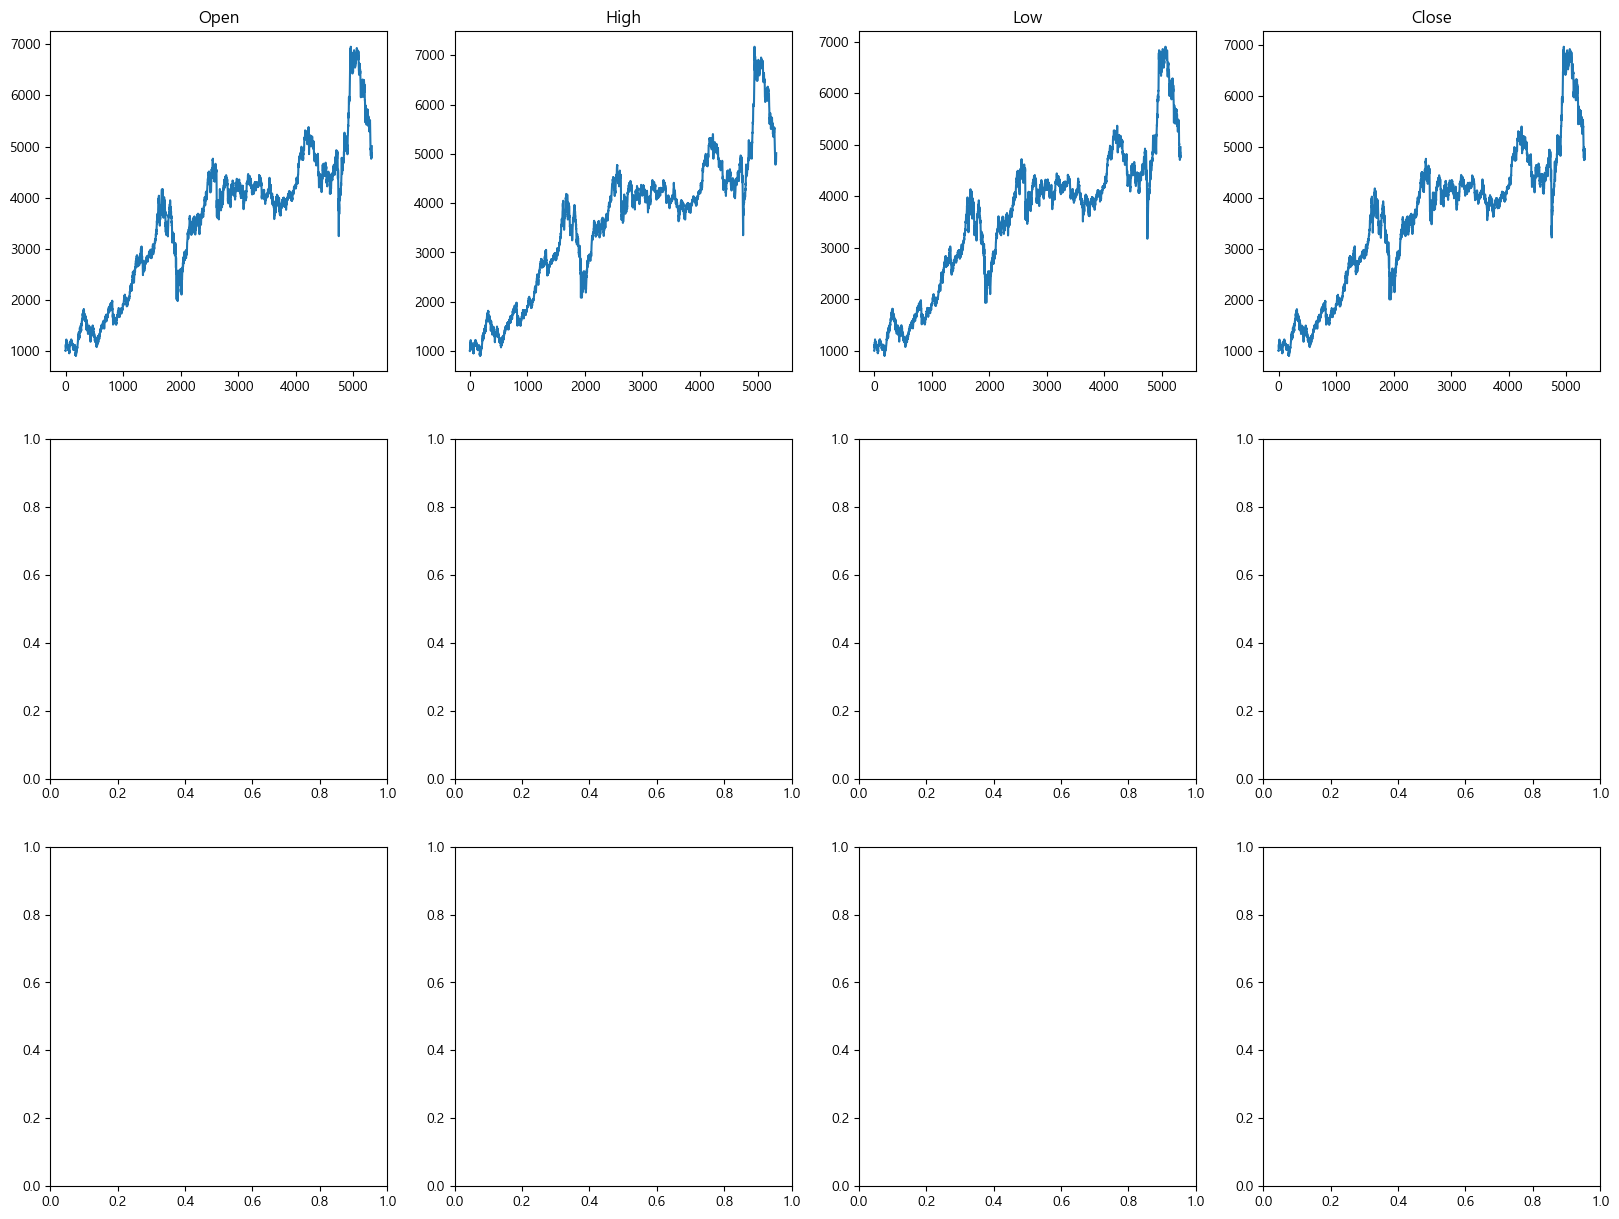

KRW_USDT


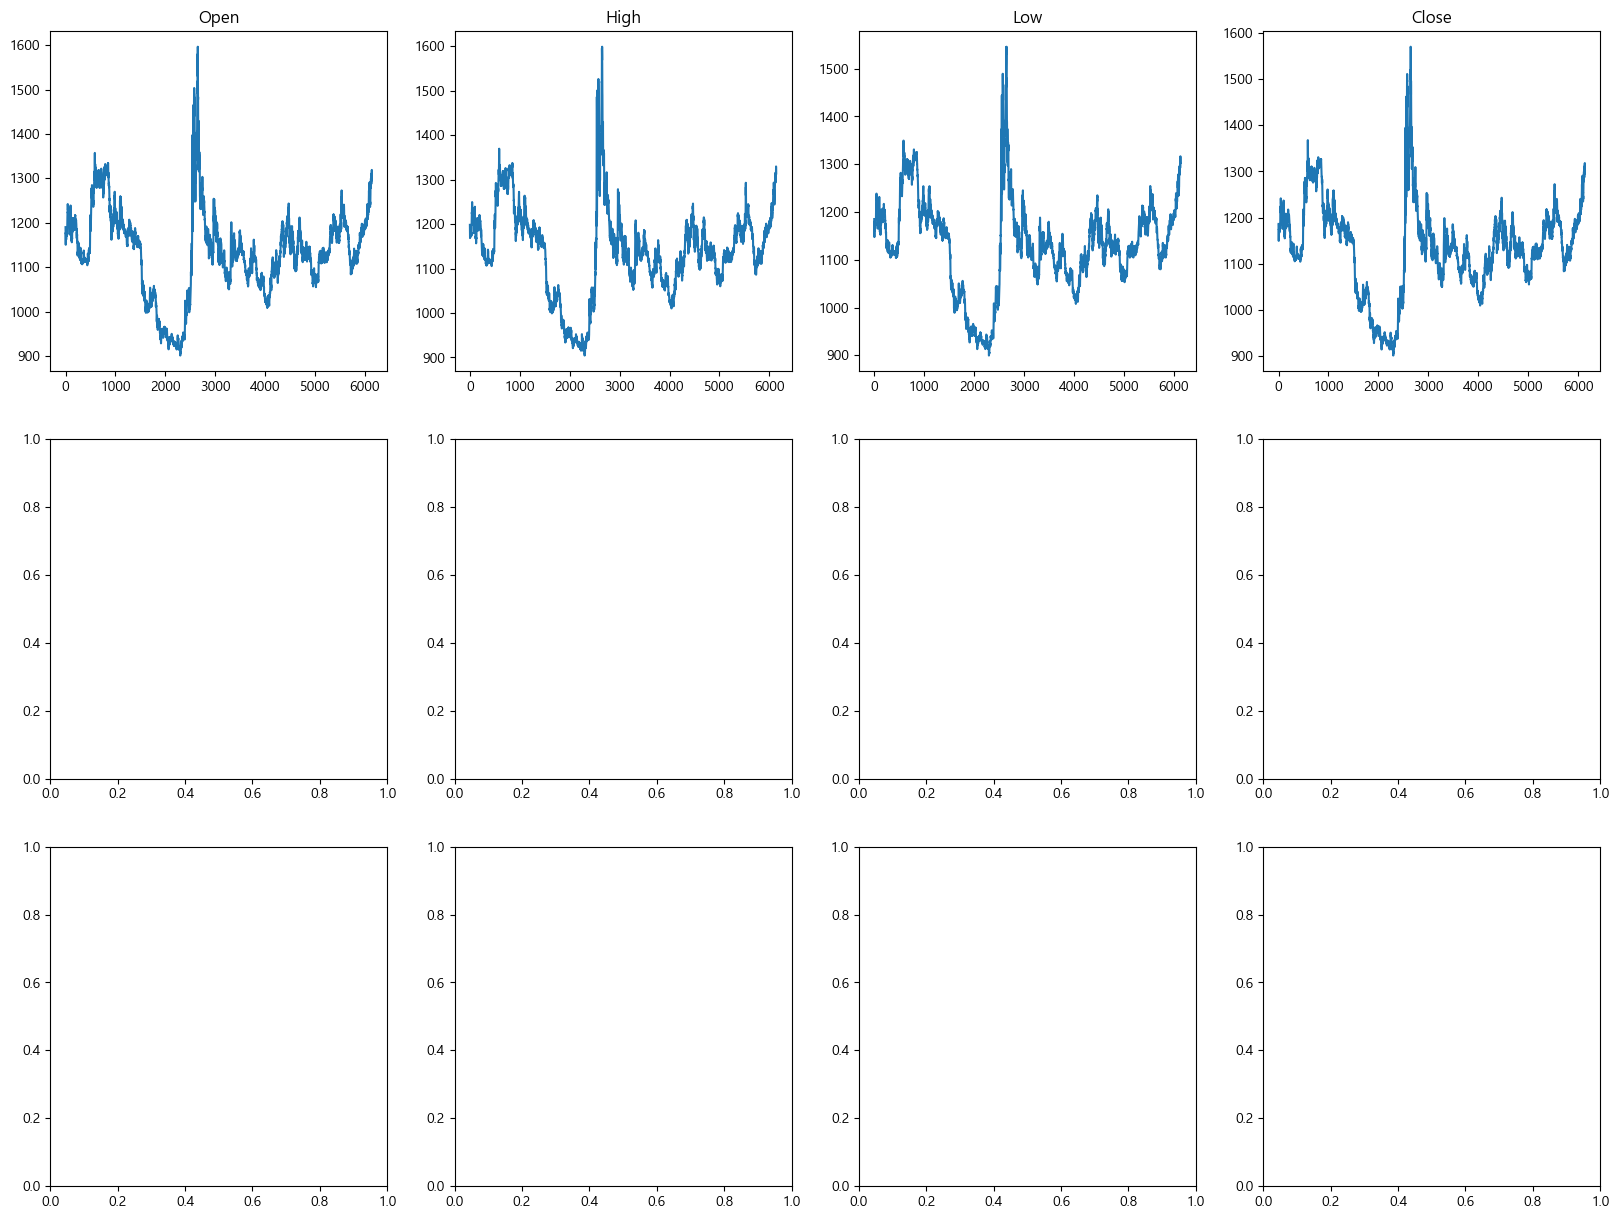

KRW_EUR


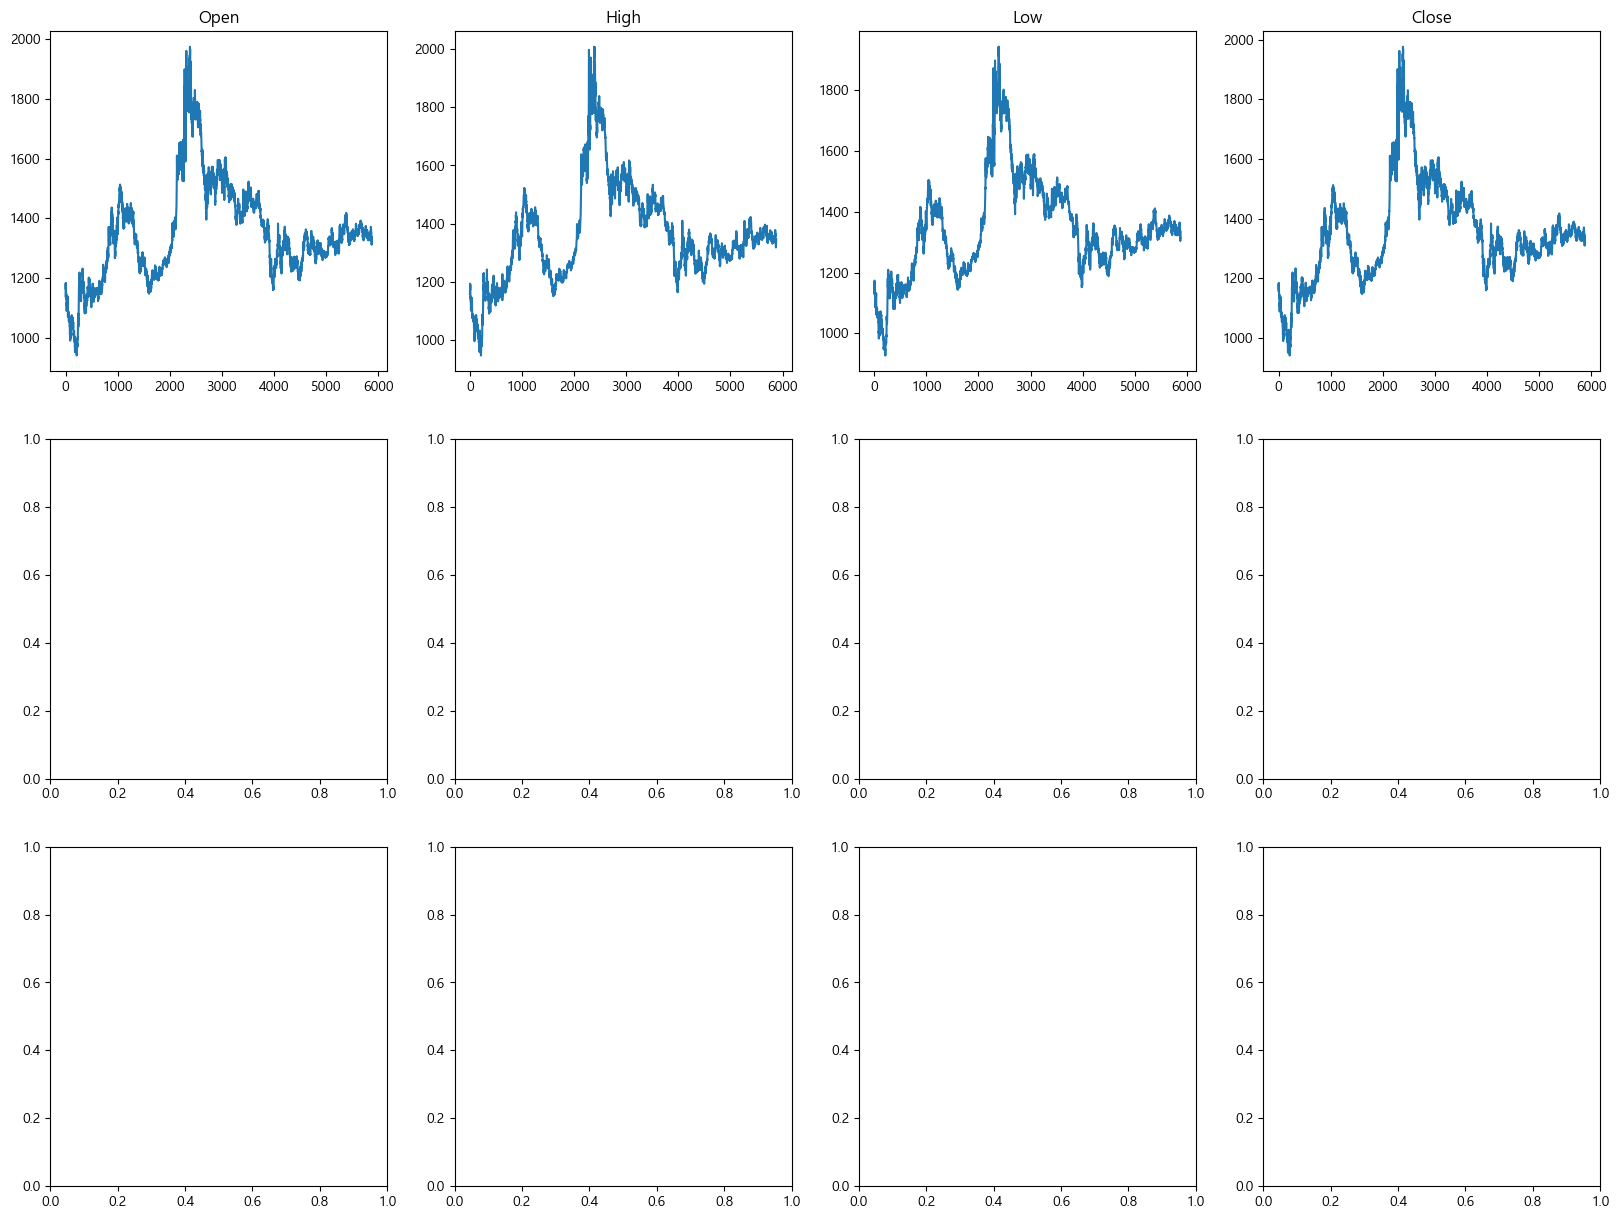

중화인민공화국 상해종합


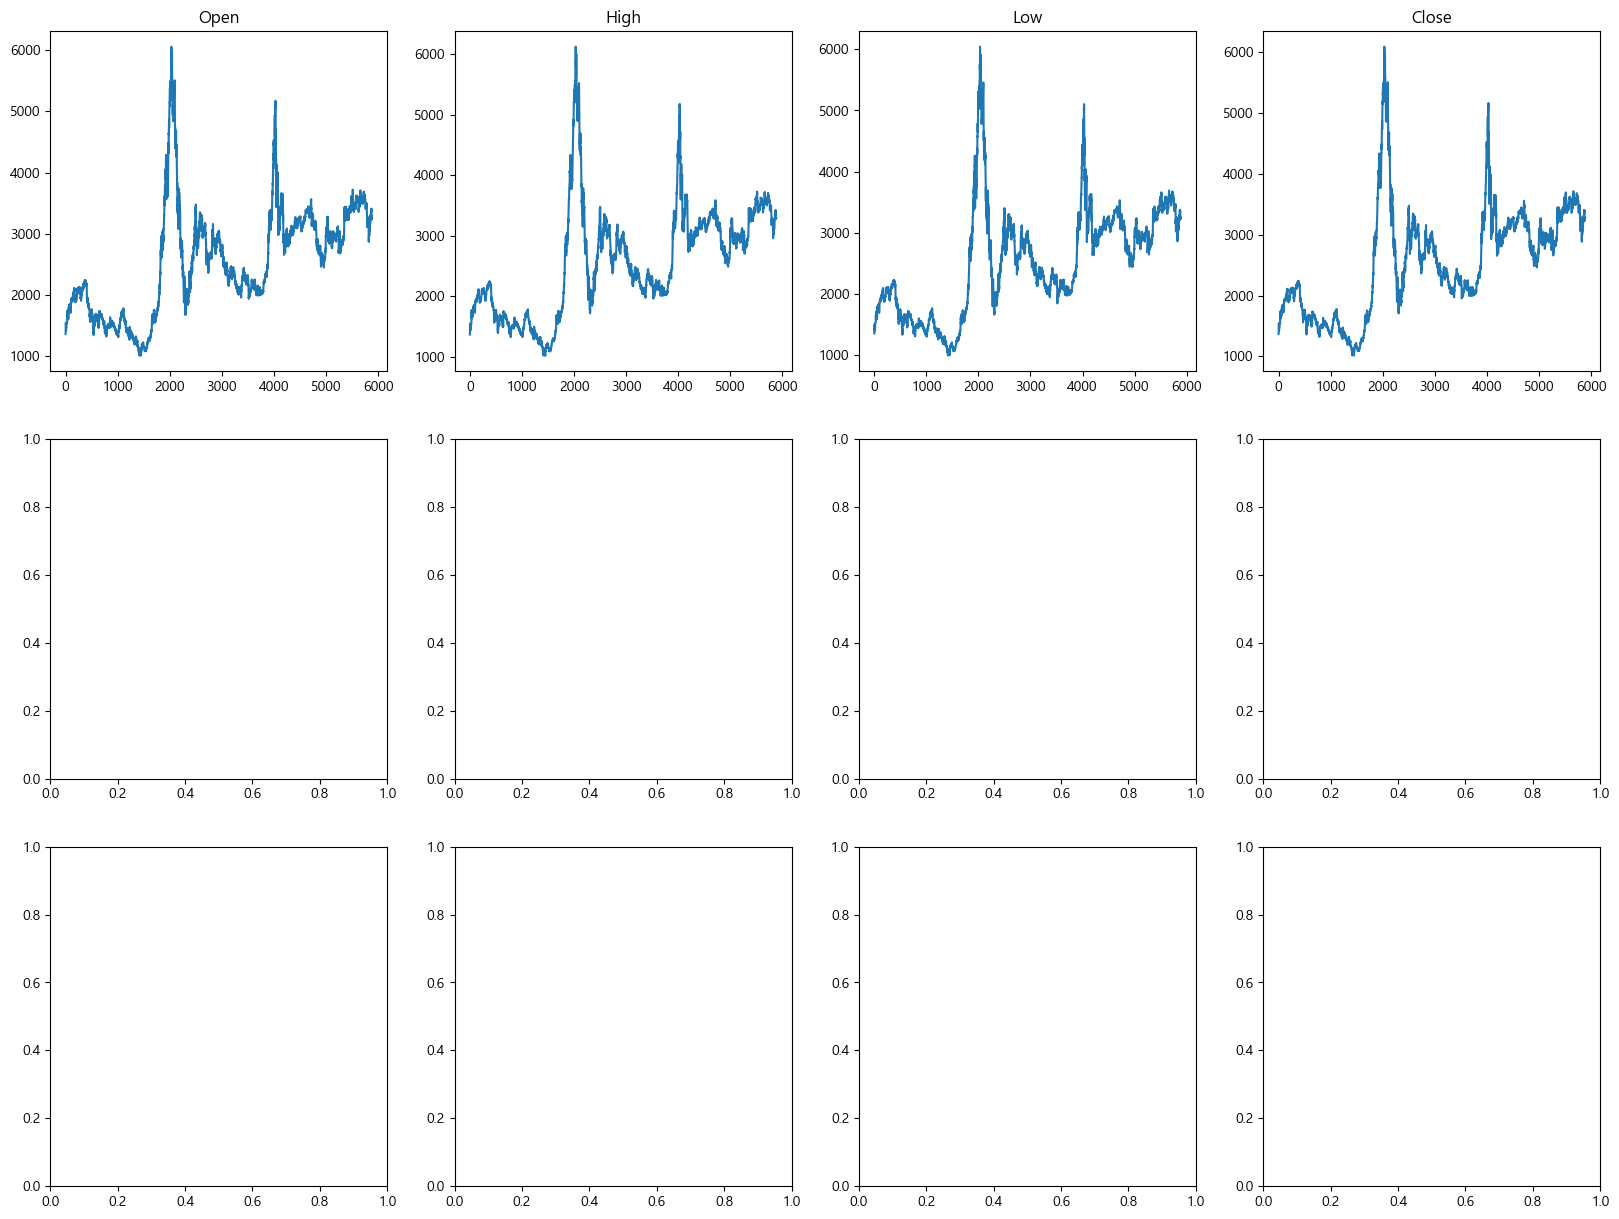

독일


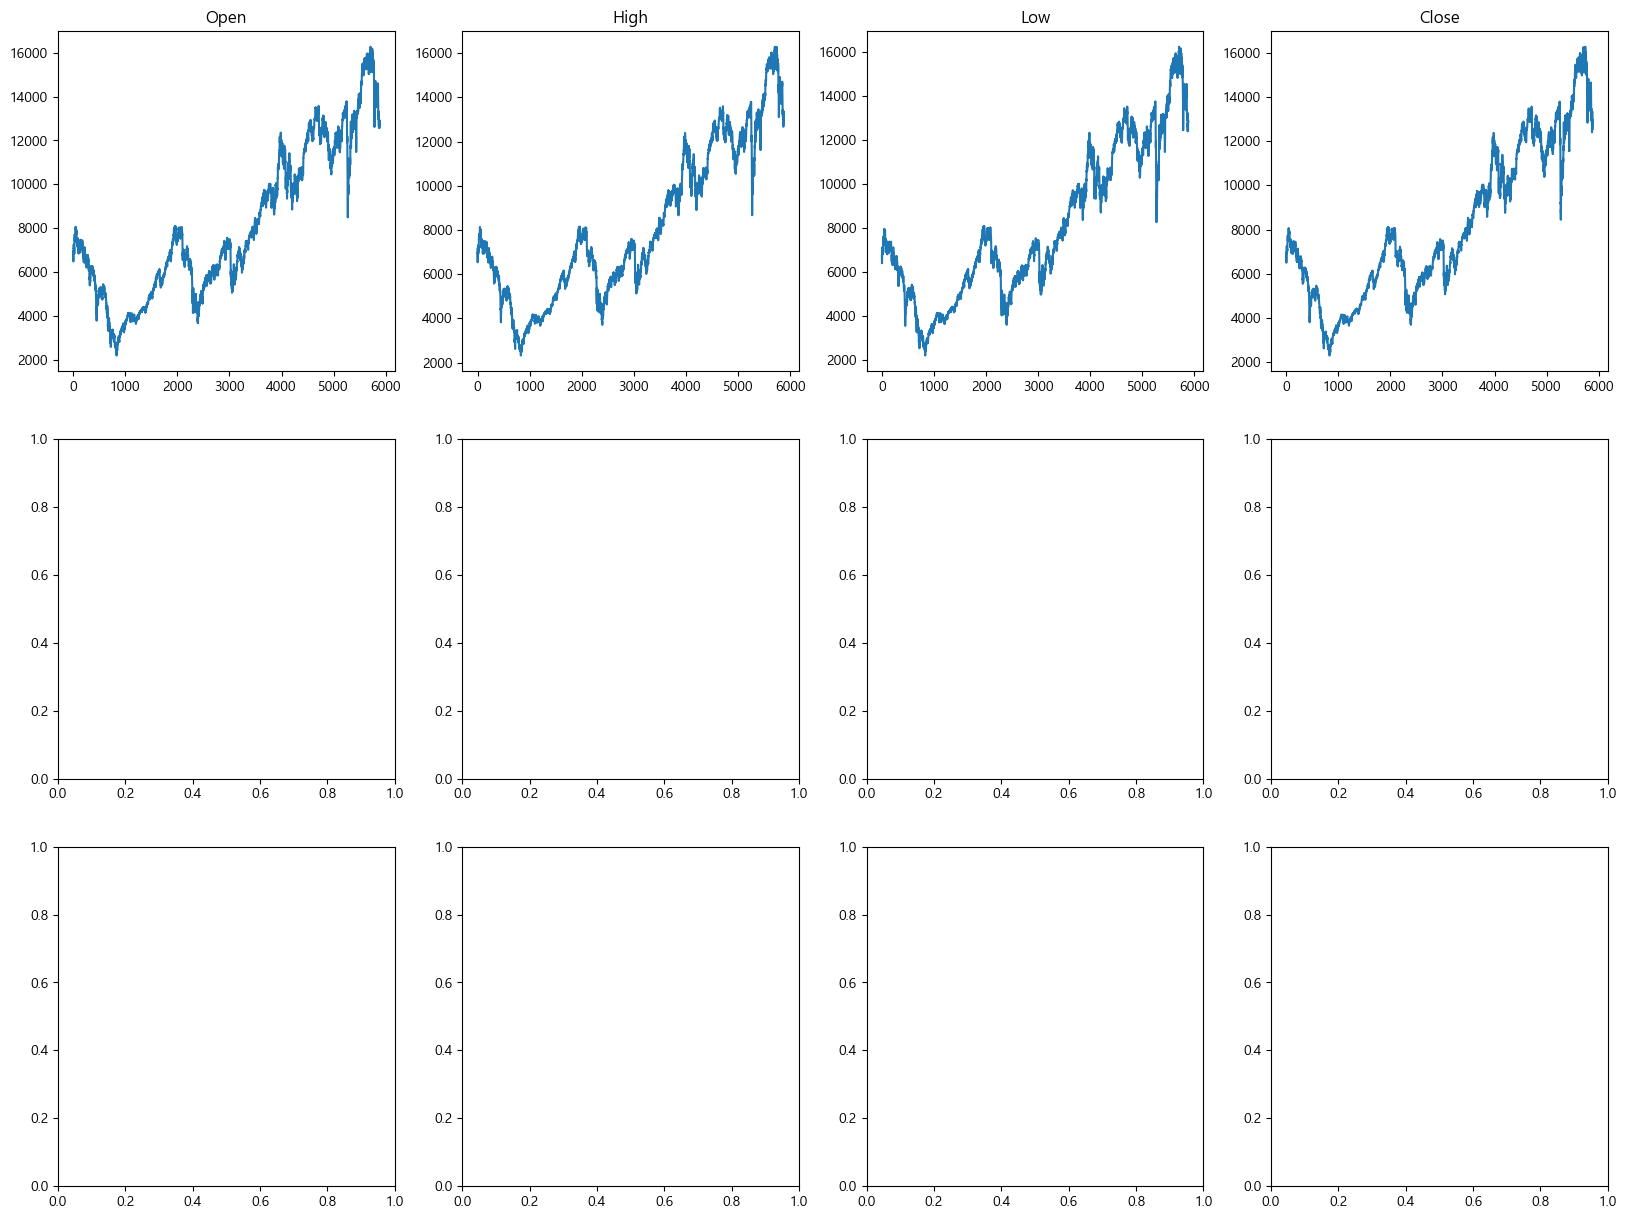

프랑스


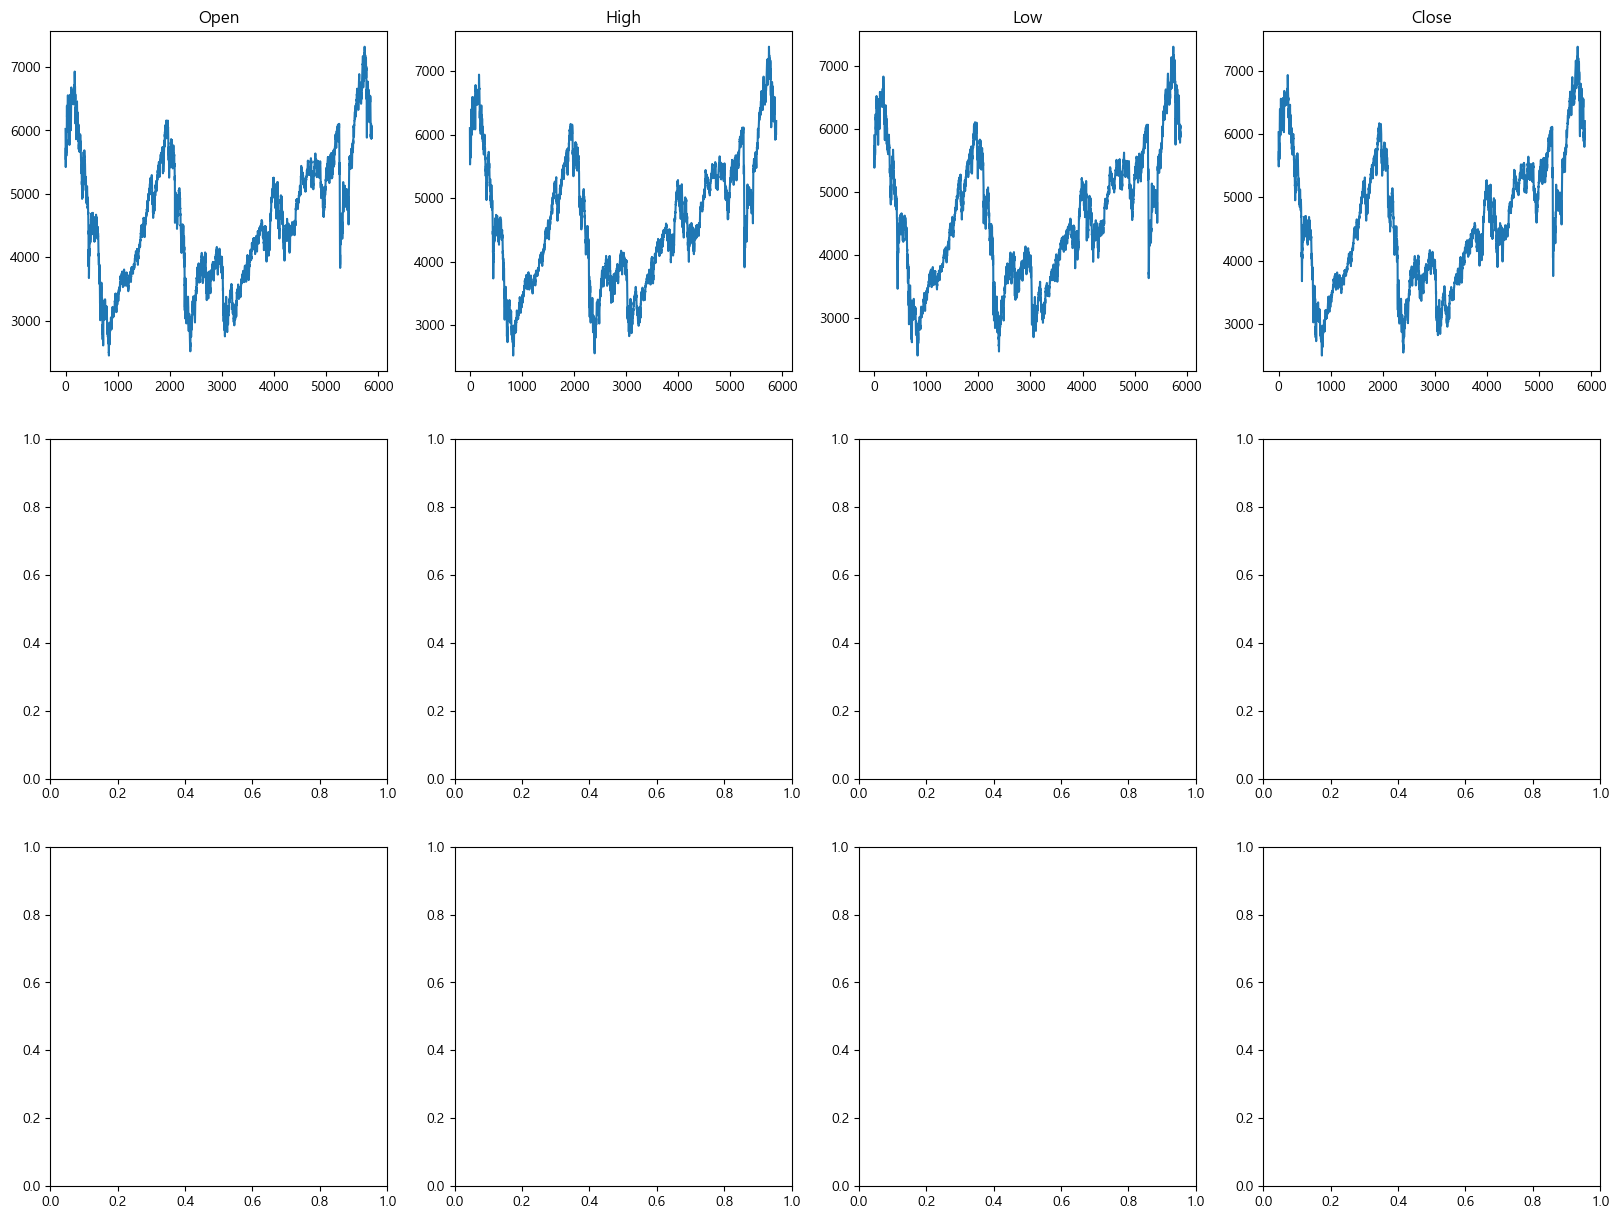

미국금리


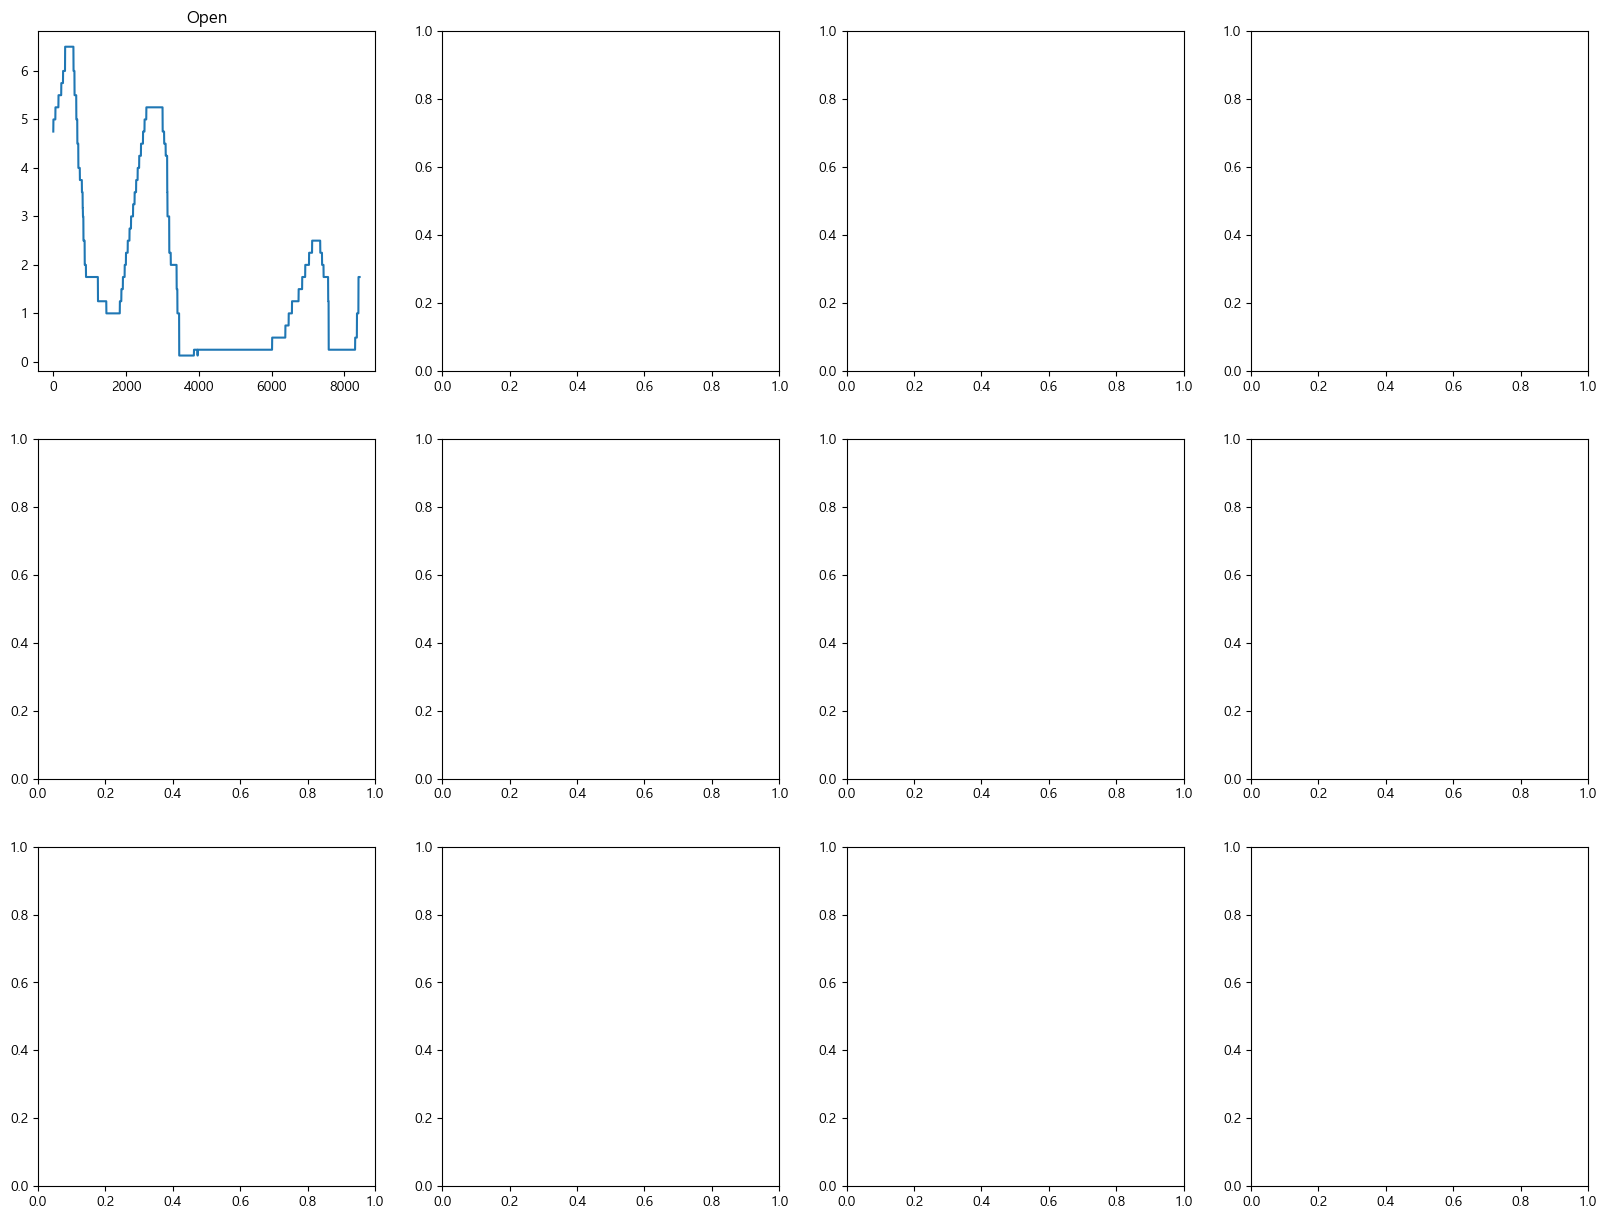

In [9]:

# pip install koreanize_matplotlib # @ 한글 깨짐 방지
import math #math 모듈을 먼저 import해야 한다.    
import matplotlib.pyplot as plt

# import seaborn as sns

    # 데이터 프레임 모든 컬럼 그리기
    # 함수명으로도 정의하기
def columns_plot(data): # y좌표
    
#     col_list_plt = list(data.select_dtypes(exclude = "object").columns)
    col_list_plt = list(data.select_dtypes(include = ["float","int"]).columns)
    x_plt_n = 3 # 한번에 그릴 plt x 축 수
    y_plt_n = 4 # 한번에 그릴 plt y 축 수
    w_space = 0.2 # float("0."+str(x_plt_n)
    h_space = 0.2 # float("0."+str(y_plt_n)
    
    if (x_plt_n < math.ceil(len(col_list_plt) / y_plt_n)):
        x_plt_n = math.ceil(len(col_list_plt) / y_plt_n)

    #plot 이쁘게 
    f, axes = plt.subplots(x_plt_n, y_plt_n)
    f.set_size_inches((20, 15))
    plt.subplots_adjust(wspace = w_space, hspace = h_space)

    for i in range(len(col_list_plt)):

        bb = math.ceil(((i )// y_plt_n))
        axes[bb][i - math.ceil(((i )// y_plt_n)) * y_plt_n].plot(data[col_list_plt[i]],label = col_list_plt[i] )#, color = 'blue', marker = 'o')
        axes[bb][i - math.ceil(((i )// y_plt_n)) * y_plt_n].set_title(col_list_plt[i])
    plt.rc('font', family='Malgun Gothic')
    plt.show()



for i in range(len(key_list)):
    print(key_list[i])
    columns_plot(All_data[key_list[i]])

In [10]:
# All_data , key_list
for i in range(len(key_list)):
    print(key_list[i])
    print(All_data[key_list[i]].info())
#     All_data[key_list[i]] = All_data[key_list[i]]

KRW_CNY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5878 non-null   object 
 1   Open    5878 non-null   float64
 2   High    5878 non-null   float64
 3   Low     5878 non-null   float64
 4   Close   5878 non-null   float64
dtypes: float64(4), object(1)
memory usage: 229.7+ KB
None
한국금리
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421 entries, 0 to 8420
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    8421 non-null   object 
 1   Open    8421 non-null   float64
dtypes: float64(1), object(1)
memory usage: 131.7+ KB
None
DXY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    5834 non-null   object 
 1   Open    5834 non-null   

In [11]:
def set_index(df):
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d', errors='raise')
    df = df.set_index('time',drop=False)
    return df

In [12]:
Use_data = {}
# All_data , key_list
for i in range(len(key_list)):
#     print(key_list[i])
#     print(All_data[key_list[i]].info())
    Use_data[key_list[i]] = All_data[key_list[i]].copy()[["time","Open"]]
#     All_data[key_list[i]] = All_data[key_list[i]]

for i in range(len(key_list)):
    print(key_list[i],i)
    Use_data[key_list[i]] = set_index(Use_data[key_list[i]])

KRW_CNY 0
한국금리 1
DXY 2
니케이 225 3
코스피 4
krx_100 5
KRW_USDT 6
KRW_EUR 7
중화인민공화국 상해종합 8
독일 9
프랑스 10
미국금리 11


In [13]:
# 기간 조정
pariod_min_list = [Use_data[key_list[i]].index.min() for i in range(len(key_list)) ]
pariod_max_list = [Use_data[key_list[i]].index.max() for i in range(len(key_list)) ]
pariod_start = max(pariod_min_list)
pariod_end = min(pariod_max_list)
print("시작일 교집합 : ",pariod_start)
print("최종일 교집합 : ",pariod_end)

#날짜 조정.(모든 사용할 데이터들의 날짜를 같게 조정함.)
for i in range(len(key_list)):
    Use_data[key_list[i]] = Use_data[key_list[i]].loc[Use_data[key_list[i]]["time"].between(pariod_start,pariod_end)]

시작일 교집합 :  2001-01-02 00:00:00
최종일 교집합 :  2022-07-19 00:00:00


In [14]:
# 모든 open 컬럼명을 데이터 프레임 이름으로 바꿈
for i in range(len(key_list)):
    Use_data[key_list[i]] = Use_data[key_list[i]].rename(columns={'Open':key_list[i]})

In [15]:
ALL_DATA_BY_USE = pd.DataFrame()
for i in range(len(key_list)):
#     Use_data[key_list[i]]
    print(len(Use_data[key_list[i]]),key_list[i])
    if i == 0: # 처음시작만 @ 또는 가장 길이가 긴 값!!!!(날짜)
        ALL_DATA_BY_USE = Use_data[key_list[i]]
    else:
        ALL_DATA_BY_USE = pd.concat([ALL_DATA_BY_USE,Use_data[key_list[i]]],axis = 1)
#     try:
#         del ALL_DATA_BY_USE["time"]
#     except:
#         pass
ALL_DATA_BY_USE = ALL_DATA_BY_USE.fillna(method="ffill")
 
if (len(ALL_DATA_BY_USE) == len(ALL_DATA_BY_USE.drop_duplicates())): # 중복데이터가 더 없는지 확인
    pass
else:
    print("길이가 다름")
    
# try:
#     del ALL_DATA_BY_USE["time"]
# except:
#     pass

try:
    del ALL_DATA_BY_USE["time"]
except:
    pass

use_columns = list(ALL_DATA_BY_USE.columns)
target = "KRW_USDT"

5617 KRW_CNY
7869 한국금리
5577 DXY
5621 니케이 225
5621 코스피
5325 krx_100
5618 KRW_USDT
5619 KRW_EUR
5621 중화인민공화국 상해종합
5621 독일
5621 프랑스
7869 미국금리


#### 파생변수 생성(금리 상승 하락 1,0으로) or 그냥 예측
#### LSTM 사용

In [10]:
## 교수님과 토론할것 => 몇일이나 뒤의 달러를 예측해야 할까..? 또 이부분에 따라서 수익율이 달라지게 나올 수 있을 것 같음. => LP모델을 사용? grid search 를 사용..?


In [11]:
# 파생변수 # 새로 만들것! @
# ALL_DATA_BY_USE["한국금리"]
# ALL_DATA_BY_USE["미국금리"]


In [12]:
# index가 time의 경우 안좋기 때문에 인덱스 변환.
ALL_DATA_BY_USE = ALL_DATA_BY_USE.reset_index(drop = True)
ALL_DATA_BY_USE

,DXY,독일,프랑스,KRW_CNY,KRW_USDT,krx_100,니케이 225,미국금리,중화인민공화국 상해종합,KRW_EUR,한국금리,코스피
0,109.33,6431.14,5956.15,154.27,1261.00,1000.00,13899.49,6.50,2077.076,1190.12,5.25,503.31
1,108.59,6284.87,5767.65,153.37,1278.00,997.82,13899.49,6.50,2108.254,1213.92,5.25,512.74
2,110.30,6443.87,5890.33,152.49,1270.50,1071.24,13898.09,6.50,2125.485,1176.95,5.25,551.53
3,108.64,6383.33,5799.18,152.40,1263.30,1111.68,13763.22,6.00,2117.664,1198.81,5.25,559.54
4,108.64,6383.33,5799.18,152.40,1263.30,1111.68,13763.22,6.00,2117.664,1198.81,5.25,559.54
...,...,...,...,...,...,...,...,...,...,...,...,...
7864,108.57,12562.15,5935.28,195.02,1317.57,4830.37,26736.08,1.75,3261.380,1319.95,2.25,2335.12
7865,108.57,12562.15,5935.28,195.02,1317.57,4830.37,26736.08,1.75,3261.380,1319.95,2.25,2335.12
7866,107.98,12562.15,5935.28,195.02,1317.57,4830.37,26736.08,1.75,3261.380,1319.95,2.25,2335.12
7867,107.86,12935.05,6070.21,195.21,1319.15,4883.78,26736.08,1.75,3235.090,1330.44,2.25,2350.48


### 시계열 분해 데이터 추가


<Figure size 432x288 with 0 Axes>

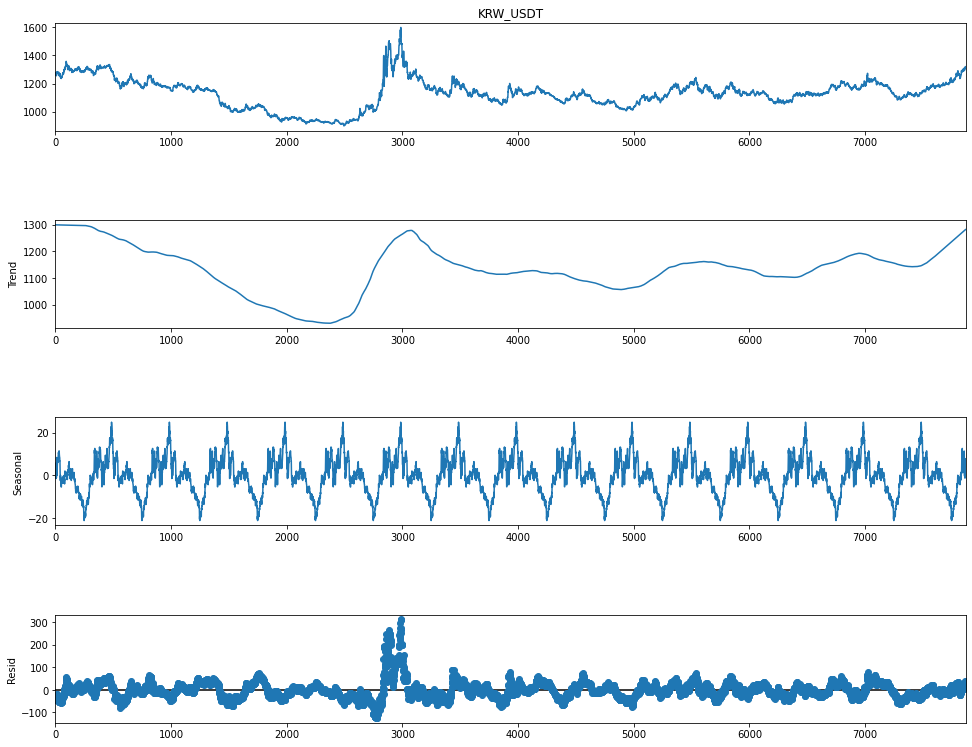

In [15]:

from statsmodels.tsa.seasonal import seasonal_decompose


open_col = seasonal_decompose(ALL_DATA_BY_USE[target], model = 'additive' ,period = 500, extrapolate_trend = 1)

fig = plt.figure()
fig = open_col.plot()
fig.set_size_inches(15,12)

ALL_DATA_BY_USE[target+'col_trend'] = open_col.trend
ALL_DATA_BY_USE[target+'col_seasonal'] = open_col.seasonal
ALL_DATA_BY_USE[target+'col_resid'] = open_col.resid

In [229]:
# @@ 나중에 a는 김프 예측할때에 맞춰서 바꾸기 (날짜 약 2년정도만 수익율 보게)
# ALL_DATA_BY_USE[:-a]

### 머신러닝(딥러닝 제외)를 위한 데이터 전처리
추가할것.. scaling에 있어서 정해진 범위 까지만 스케일링 하여야 하나..

In [17]:
# X_data = ALL_DATA_BY_USE[list(set(use_columns) - {target})]
X_data = ALL_DATA_BY_USE
Y_data = ALL_DATA_BY_USE[[target]]
ALL_DATA_BY_USE = pd.concat([X_data,Y_data],axis = 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,LabelEncoder,StandardScaler

# 이부분 class로 변환할까? 나중에 정해진 범위까지만 데이터 스케일링 할 수도 있음.
# def MinMaxScaler_fun(df): #맞춤 변환 함수와 그에 맞는 데이터를 돌려줌
#     col = list(df.columns)
#     Scaler = MinMaxScaler()
#     Scaler.fit(df)
#     df = Scaler.transform(df)
# #     df = Scaler_X.fit_transform(df)
#     df = pd.DataFrame(df, columns = X_col)
#     return df, Scaler
# X_data ,Scaler = MinMaxScaler_fun(X_data)
# Y_data , Y_data_Scaler = MinMaxScaler_fun(Y_data)

X_col = list(X_data.columns)
Scaler = MinMaxScaler()
Scaler.fit(X_data)
X_data = Scaler.transform(X_data)
#     df = Scaler_X.fit_transform(df)
X_data = pd.DataFrame(X_data, columns = X_col)
    
# 모데링 잘나오게만 할거면 이렇게 하면 됨



# @@ 나중에 여기에 검증셋으로 나누어서 하는 모델도 추가.

In [19]:
# 최대최소 정규화
Y_col = list(Y_data.columns)

MAX_val = float(max(Y_data.values))
MIN_val = float(min(Y_data.values))
# 변환(man,max 변환을 또해주면 기존값을 잃어버림.)
Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x - MIN_val)/(MAX_val - MIN_val))
# 역변환
# Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val))

c:\users\happy\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### LSTM을 위한 전처리
사용가능 초매게변수 : 에포크 , 배치사이즈, 윈도우 사이즈 , 변수 추가 , 활성화 함수(럭키렐루)수치,  최적회기법(adam)(RMSprop), 
또.... 뭐가 있지..

In [20]:
# 지정해야할 초기변수들 
WINDOW_SIZE=64 # 64 #1024 # n일간 데이터를 기반으로 내일 데이터 예측 @@ 더 장기간 데이터 예측가능?
BATCH_SIZE=16 # 32
day_offset = 0 # 예측할 미래 날짜 day_offset = 0 이면 하루 뒤

In [21]:
def make_window_size_dataset(data, label, window_size, day_offset=0): # x값 , y값 , 윈도우 사이즈, 예측할 미래 날짜
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size - day_offset):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size + day_offset]))
    return np.array(feature_list), np.array(label_list)

x_WINDOW, y_WINDOW = make_window_size_dataset(X_data, Y_data, WINDOW_SIZE, day_offset)
x_WINDOW.shape,y_WINDOW.shape

((7805, 64, 15), (7805, 1))

In [22]:
a = math.floor(y_WINDOW.shape[0]*0.2)

y_train_WINDOW = y_WINDOW[:-a]
y_test_WINDOW = y_WINDOW[-a:]

x_train_WINDOW = x_WINDOW[:-a]
x_test_WINDOW = x_WINDOW[-a:]

In [23]:
# a = math.floor(y_WINDOW.shape[0]*0.1)
# b = math.floor(y_WINDOW.shape[0]*0.2)

# x_train_WINDOW = x_WINDOW[:-b]
# x_validation_WINDOW = x_WINDOW[-b:-a]
# x_test_WINDOW = x_WINDOW[-a:]

# y_train_WINDOW = y_WINDOW[:-b]
# y_validation_WINDOW = y_WINDOW[-b:-a]
# y_test_WINDOW = y_WINDOW[-a:]

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, LSTM, Dense

from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras import layers
import tensorflow as tf
from keras import losses

# relu 은닉 층으로 학습
# sigmoid 이진 분류 문제
# softmax 클래스 분류 문제

leaky_relu = tf.nn.leaky_relu # leaky_relu 
activation = leaky_relu #leaky_relu#"relu"#"tanh" #"relu"=>0~1 시그모이드랑 함꼐

model = Sequential() # x_train_feature.shape[1] == WINDOW_SIZE
#activation 을 tanh 로 주는 부분도 고려
model.add(LSTM(128, activation=activation, input_shape=(x_train_WINDOW.shape[1] , x_train_WINDOW.shape[2]), return_sequences = True))
model.add(Dropout(0.8)) # 드롭아웃 추가. 비율은 50%
#@@
model.add(LSTM(64, activation=activation,return_sequences = False))#LSTM
# model.add(LSTM(64, activation=activation))#LSTM
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
# model.add(Flatten()) # Flastten 함수는 다차원 모델을 평탄화 하는 것.
# model.add(Dense(8, activation=activation)) 
# model.add(Dropout(0.1)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(1, activation=leaky_relu))#DNN


# model.compile(loss= Huber(), optimizer='adam', metrics=['mse']) # Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
model.compile(loss=Huber(), optimizer=Adam(0.00001), metrics=['mse']) #0.001이 기본 러닝 레이트
# model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# LSTM(64, activation=activation, input_shape=(x_train_WINDOW.shape[1] , x_train_WINDOW.shape[2]), return_sequences = True)
# LSTM(64, activation=activation,return_sequences = False)
# Dense(1, activation=leaky_relu)



In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64, 128)           73728     
                                                                 
 dropout (Dropout)           (None, 64, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 123,201
Trainable params: 123,201
Non-trainable params: 0
_________________________________________________________________


In [26]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
# earlystopping은 (patience 수)n번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model_path = 'C:\\Users\\Happy\\Desktop\논문용\\krwusdtdata'
filename = os.path.join(model_path,'USDT_LSTM.h5')

checkpoint = ModelCheckpoint(filename, #filepath
                             monitor='val_loss',#모델 저장시 기준이 되는 값 => val_loss는 loss가 가장 적을 때 저장
                             verbose=1, # 이게 1 이면 저장되었다고 표시됨
                             save_best_only=True, # True의 경우 학습 중 현 시점 가장 좋은 모델로 저장됨
                             save_weights_only=True, # True의 경우 모델 레이어 및 가중치도 저장됨
#                              save_freq = BATCH_SIZE, # 'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다. integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
                             mode='auto'# val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다. 만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다. auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.
                            )

In [ ]:
history = model.fit(x_train_WINDOW, y_train_WINDOW, 
                                    epochs=1000, 
                                    batch_size=BATCH_SIZE,
#                                     validation_data=(x_validation_WINDOW, y_validation_WINDOW),
                                    validation_data=(x_test_WINDOW, y_test_WINDOW), 
                                    callbacks=[early_stop, checkpoint]) # 여기에 얼리스타핑 ,드롭아웃, L1,L2,엘라 규제 등 추가 가능
# model.load_weights(filename)

Epoch 1/1000
391/391 [==============================] - ETA: 0s - loss: 0.0219 - mse: 0.0438
Epoch 00001: val_loss improved from inf to 0.00305, saving model to C:\Users\Happy\Desktop\논문용\krwusdtdata\USDT_LSTM.h5
391/391 [==============================] - 20s 46ms/step - loss: 0.0219 - mse: 0.0438 - val_loss: 0.0031 - val_mse: 0.0061
Epoch 2/1000
391/391 [==============================] - ETA: 0s - loss: 0.0127 - mse: 0.0254
Epoch 00002: val_loss did not improve from 0.00305
391/391 [==============================] - 17s 43ms/step - loss: 0.0127 - mse: 0.0254 - val_loss: 0.0037 - val_mse: 0.0074
Epoch 3/1000
391/391 [==============================] - ETA: 0s - loss: 0.0095 - mse: 0.0189
Epoch 00003: val_loss did not improve from 0.00305
391/391 [==============================] - 16s 41ms/step - loss: 0.0095 - mse: 0.0189 - val_loss: 0.0056 - val_mse: 0.0112
Epoch 4/1000
391/391 [==============================] - ETA: 0s - loss: 0.0083 - mse: 0.0165
Epoch 00004: val_loss did not improve

In [ ]:
model.load_weights(filename) #저장된 최적 모델 불러옴 끄면 그냥 최종 모델 사용가능

In [ ]:
# pred = model.predict(x_validation_WINDOW) # 검증값

# print(y_validation_WINDOW.shape, pred.shape)

# plt.figure(figsize=(12, 9))
# plt.plot(np.asarray(y_validation_WINDOW)[:], label='actual')
# plt.plot(pred, label='prediction')
# plt.legend()
# plt.show()

In [ ]:
pred = model.predict(x_test_WINDOW)[:] #예측값
actual = np.asarray(y_test_WINDOW)[:]
print(y_test_WINDOW.shape, pred.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(x_test_WINDOW) #예측값
actual = np.asarray(y_test_WINDOW)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

### 데이터 분석 (추후 추가. 시계열 분해 등.)
시계열 분해 데이터를 추가하여 해보자 , 그리고 ARIMA모형으로 예측도 해보자.

### 그리드 서치

### 모델 이상없는지 시각화 및 계량화

### 딥러닝을 제외한 머신러닝

In [ ]:
dat_offset = 0

In [ ]:
# X_data = ALL_DATA_BY_USE[list(set(use_columns) - {target})]
X_data = ALL_DATA_BY_USE.copy()
Y_data = ALL_DATA_BY_USE[[target]].copy()
# ALL_DATA_BY_USE = pd.concat([X_data,Y_data],axis = 1)

# 다음날 달러가격을 예측해야 하니까
X_data = X_data[:-1-dat_offset].reset_index(drop = True)
Y_data = Y_data[1+dat_offset:].reset_index(drop = True)



In [ ]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,LabelEncoder,StandardScaler

# 이부분 class로 변환할까? 나중에 정해진 범위까지만 데이터 스케일링 할 수도 있음.
# def MinMaxScaler_fun(df): #맞춤 변환 함수와 그에 맞는 데이터를 돌려줌
#     col = list(df.columns)
#     Scaler = MinMaxScaler()
#     Scaler.fit(df)
#     df = Scaler.transform(df)
# #     df = Scaler_X.fit_transform(df)
#     df = pd.DataFrame(df, columns = X_col)
#     return df, Scaler
# X_data ,Scaler = MinMaxScaler_fun(X_data)
# Y_data , Y_data_Scaler = MinMaxScaler_fun(Y_data)

X_col = list(X_data.columns)
Scaler = MinMaxScaler()
Scaler.fit(X_data)
X_data = Scaler.transform(X_data)
#     df = Scaler_X.fit_transform(df)
X_data = pd.DataFrame(X_data, columns = X_col)
    
# 모데링 잘나오게만 할거면 이렇게 하면 됨

# 최대최소 정규화
Y_col = list(Y_data.columns)

MAX_val = float(max(Y_data.values))
MIN_val = float(min(Y_data.values))
# 변환(man,max 변환을 또해주면 기존값을 잃어버림.)
Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x - MIN_val)/(MAX_val - MIN_val))
# 역변환
# Y_data[Y_col] = Y_data[Y_col].apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val))

In [ ]:
a = math.floor(Y_data.shape[0]*0.2)

y_train = Y_data[:-a]
y_test = Y_data[-a:]

x_train = X_data[:-a]
x_test = X_data[-a:]

## Xgboost

In [ ]:
# xgboost

from xgboost import XGBRegressor
# model = XGBRegressor(eval_metric = "rmse", booster='gblinear',
#             base_score=0.5,  max_depth=6, learning_rate=0.001, n_estimators=100 ,reg_alpha=1, reg_lambda=1,
#             colsample_bylevel=1,colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#             importance_type='gain', interaction_constraints='', max_delta_step=0, 
#             min_child_weight=1, missing='nan', monotone_constraints='()',
#             n_jobs=0, num_parallel_tree=1, random_state=0,
#             scale_pos_weight=1, subsample=1,
#             tree_method='exact', validate_parameters=1, verbosity=None)
model = XGBRegressor(eval_metric = 'rmse',booster='gblinear',use_label_encoder = False )

model.fit(x_train,y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='rmse',
#            eval_set=[(x_validation, y_validation)])
          eval_set=[(x_test, y_test)])

pred = model.predict(x_test)



In [ ]:
model_path = 'C:\\Users\\Happy\\Desktop\논문용\\krwusdtdata'
filename = os.path.join(model_path,'USDT_xgb.model')

# 모델 저장
model.save_model(filename)

# 모델 불러오기
new_xgb_model =  XGBRegressor(eval_metric = 'rmse',booster='gblinear',use_label_encoder = False ) # 모델 초기화
new_xgb_model.load_model(filename) # 모델 불러오기

In [ ]:
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]
print(x_test.shape, y_test.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

In [ ]:
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

### 랜덤 포레스트 

In [ ]:
# 회귀모델
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor, StackingRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor # light xgboost
import lightgbm as lgb # lgb자체로도 학습이 가능 !! # https://for-my-wealthy-life.tistory.com/24



In [ ]:
### 모델링

model = AdaBoostRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = BaggingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = ExtraTreesRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = GradientBoostingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = HistGradientBoostingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = RandomForestRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = StackingRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = SVR()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = XGBRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = XGBRFRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

In [ ]:
### 모델링

model = LGBMRegressor()
# help(model)
model.fit(x_train,y_train.values.flatten())

pred = model.predict(x_test)


##################### 검증
pred = model.predict(x_train)[:] #검증
actual = np.asarray(y_train)[:]

print(x_test.shape, y_test.shape)


pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('train_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()

print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

##################### 예측 
pred = model.predict(x_test) #예측값
actual = np.asarray(y_test)

pred = pd.DataFrame(pred,columns = ["예측값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 원래 값 복원
actual = pd.DataFrame(actual,columns = ["실제값"]).apply(lambda x : (x * (MAX_val - MIN_val) + MIN_val)) # 예측 값 복원

print(pred.shape, actual.shape)

i = 0
j = len(pred)

plt.figure(figsize=(12, 9))
plt.title('test_data')
plt.plot(actual[i:j], label='actual')
plt.plot(pred[i:j], label='prediction')
plt.legend()
plt.show()


print("모델 설명력 (학습)",model.score(x_train,y_train[target]))
print("모델 설명력 (검증)",model.score(x_test,y_test[target]))

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE",mean_squared_error(actual["실제값"],pred["예측값"]))

### light xgboost

In [ ]:
import lightgbm as lgb # lgb자체로도 학습이 가능 !! # https://for-my-wealthy-life.tistory.com/24
lgb.Dataset(X_train, label=y_train.values)

In [ ]:
import lightgbm as lgb

#파라미터는 dict에
param = {'num_leaves': 31, 'objective': 'binary', 'metric':'auc'}

#train data를 별도의 Dataset객체로 만들어야 함
train_data = lgb.Dataset(X_train, label=y_train.values)

#boosting을 몇 번 할건지 결정
num_round = 10 

#모델에 훈련
bst = lgb.train(param, train_data, num_round)

#예측
y_pred_val = bst.predict(X_val)
print(y_pred_val)